In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_05s_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

all_animals_vhpc  = np.loadtxt('../allmice.txt', dtype=str)
expo_animals_vhpc = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals_vhpc  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals_vhpc = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals_vhpc = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
ext2_animals_vhpc = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals_vhpc = np.loadtxt('../ext1_mice.txt', dtype=str)

all_animals =  'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
expo_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
pre_animals =  'dhpcg1','dhpc24'           ,'dhpc35','dhpc36'
d2_animals =   'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
post_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
renew_animals ='dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
ext2_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
ext1_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'

In [7]:
sessions = 'expo', 'pre', 'post', 'ext1', 'ext2', 'renew'
sessions_b = 'expo','pre','d2', 'post', 'ext1', 'ext2', 'renew'

In [41]:
v_name=[]
for t in range(30):
    for r in 'dhpc','vhpc':
        exec("scores_gmin_tb_%s_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'scores_gmin_tb_%s'"%(t,))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_05sec/'"%(r))
            exec("scores_gmin_tb_%s_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("scores_gmin_tb_%s_%s_t = scores_gmin_tb_%s_%s_t['%s']"%(t,r,t,r,sess))
            #exec("scores_gmin_tb_%s_%s['%s'] = scores_gmin_tb_%s_%s_t"%(t,r,sess,t,r))

In [42]:
#get mean of each array
for t in range(30):
    for r in 'dhpc','vhpc':
        exec("mean_scores_gmin_tb_%s_%s={}"%(t,r))
        for sess in sessions_b:
            exec("mean_scores_gmin_tb_%s_%s[sess]=[]"%(t,r))
            for i in eval("scores_gmin_tb_%s_%s[sess]"%(t,r)):
                exec("mean_scores_gmin_tb_%s_%s[sess].append(i.mean())"%(t,r))

In [43]:
loops=10
for t in range(30):
    exec("ttest_tb_%s = {}"%t)
    exec("mannwhitU_tb_%s = {}"%t)
    for sess in sessions_b:
        exec("ttest_tb_%s[sess] = sstats.ttest_ind(mean_scores_gmin_tb_%s_dhpc[sess][:loops],mean_scores_gmin_tb_%s_vhpc[sess][:loops])"%(t,t,t))
        exec("mannwhitU_tb_%s[sess] = sstats.mannwhitneyu(mean_scores_gmin_tb_%s_dhpc[sess][:loops],mean_scores_gmin_tb_%s_vhpc[sess][:loops])"%(t,t,t))

In [44]:
v_name=[]
for t in range(30):
    for r in 'dhpc','vhpc':
        exec("scores_tb_%s_ncells_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'scores_tb_%s_ncells'"%(t))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_05sec/'"%(r))
            exec("scores_tb_%s_ncells_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("scores_tb_%s_ncells_%s_t = scores_tb_%s_ncells_%s_t['%s']"%(t,r,t,r,sess))
            #exec("scores_tb_%s_ncells_%s['%s'] = scores_tb_%s_ncells_%s_t"%(t,r,sess,t,r))

In [45]:
v_name=[]
for t in range(30):
    for r in 'dhpc','vhpc':
        exec("n_cells_%s_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'n_cells_%s'"%(t))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_05sec/'"%(r))
            exec("n_cells_%s_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("n_cells_%s_%s_t = n_cells_%s_%s_t['%s']"%(t,r,t,r,sess))
            #exec("n_cells_%s_%s['%s'] = n_cells_%s_%s_t"%(t,r,sess,t,r))

In [46]:
trad_co = ('limegreen','b','r','silver','grey','y')
pal_co = ('#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600')
dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
dark_co_b = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')
alt_co = ('hotpink','mediumorchid','darkturquoise','mediumspringgreen','lawngreen','khaki')
session_labels = ('Pre','Early','Late','Ext1','Ext2','Reinstate')
session_labels_b = ('Pre','Early','Day2','Late','Ext1','Ext2','Reinstate')

In [47]:
#delta_t0 = 0.5
#t_start0 = -4.5  # sec
#t_stop0 = 10.5  # sec

## odor onset = tb9
##trace onset = tb13

In [48]:
def plot_scores_vs_ncells(ncells, scores, labels=True, dots=False, dot_color=(1, 0.7, 0.7), color='r', chance=None, ax=None):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 1))
    if dots == True:
        ax.plot(ncells, scores*100, 'o', ms=2, mew=0, color=dot_color, zorder=0)
    m = scores.reshape(-1, n_loops).mean(1)*100
    s = np.std(scores.reshape(-1, n_loops), 1)*100
    n = ncells[::n_loops]
    ax.plot(n, m, color=color)
    ax.fill_between(n,m-s,m+s,alpha=0.2,color=color,linewidth=0)
    #ax.errorbar(ncells[::n_loops], scores.reshape(-1, n_loops).mean(1)*100,
    #            np.std(scores.reshape(-1, n_loops), 1)*100,color=color)
    ax.set_ylim(40, 100)
    
    if labels:
        ax.set_xlabel("No. of Cells")
        ax.set_ylabel("Performance")

    if chance is not None:
        xmin, xmax, _, _  = ax.axis()
        ax.hlines(chance, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')

    return ax

def plot_scores_compare2(score1, score2, colors=['b', 'r',], labels=True, chance=None, ax=None, tick_lab=['pre','post']):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 2))
    values = [score1*100, score2*100]
    pt.plot_bars(values, ax=ax, colors=colors, stderr=False)
    if chance is not None:
        ax.hlines(chance, -0.5, 2-0.5, linestyles='dashed')

    ax.set_xticks(range(2))
    ax.set_xticklabels(tick_lab, rotation=30)
    
    ax.set_ylim(40,100)

    if labels:
        ax.set_ylabel('Decoding Performance (%)')
    pvs = []
    pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
    
    return ax

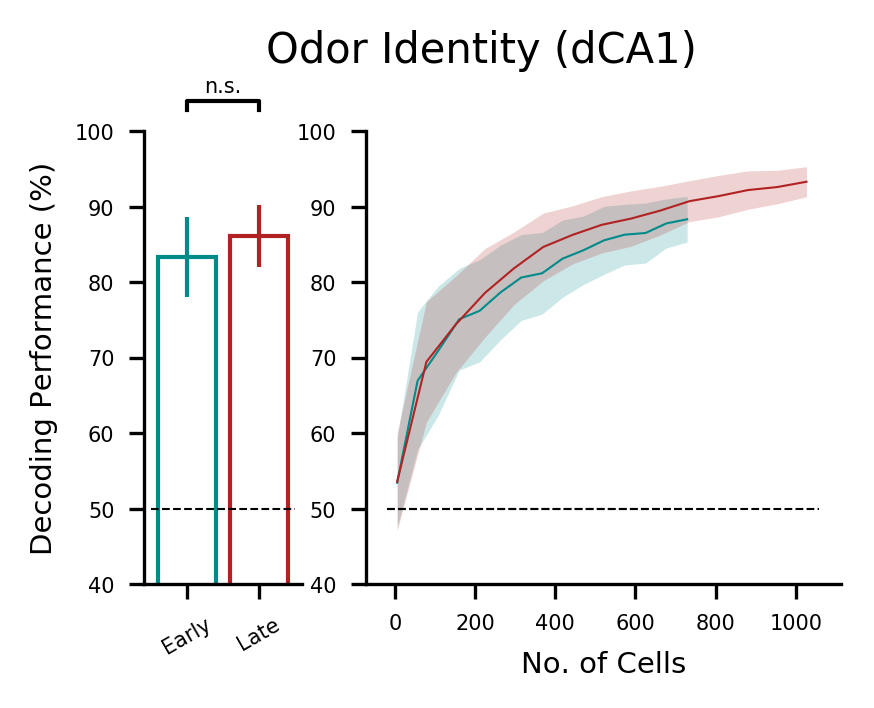

In [49]:
n_loops=200
fig, axs = pl.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios':[1,3]})

plot_scores_compare2(scores_gmin_tb_11_dhpc['pre'][:n_loops].mean(1), scores_gmin_tb_11_dhpc['post'][:n_loops].mean(1), chance=50,
                     ax=axs[0], colors=[dark_co_b[1],dark_co_b[3]],tick_lab=['Early','Late'])

plot_scores_vs_ncells(n_cells_11_dhpc['pre'], scores_tb_11_ncells_dhpc['pre'].mean(1), dot_color=(0.7, 0.7, 1), color=dark_co_b[1], chance=50, 
                      ax=axs[1], labels=False,dots=False)
plot_scores_vs_ncells(n_cells_11_dhpc['post'], scores_tb_11_ncells_dhpc['post'].mean(1), color=dark_co_b[3],chance=50,
                      ax=axs[1], labels=False,dots=False)
axs[1].set_xlabel("No. of Cells")

fig.suptitle("Odor Identity (dCA1)", fontsize=10, y=1.05)

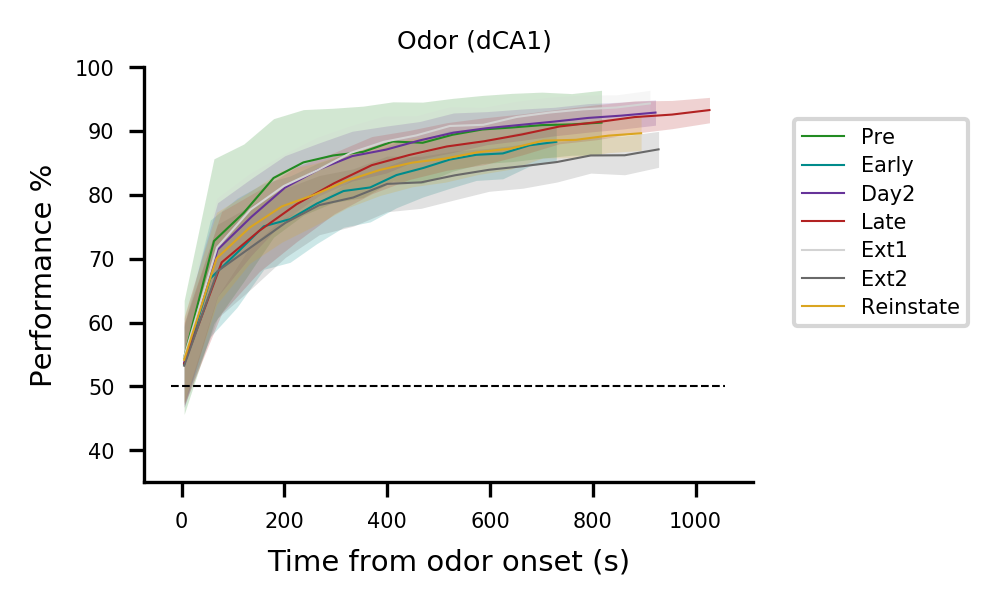

In [50]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_11_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_11_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Odor (dCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_dhpc.pdf'%NOTEBOOK_NAME)

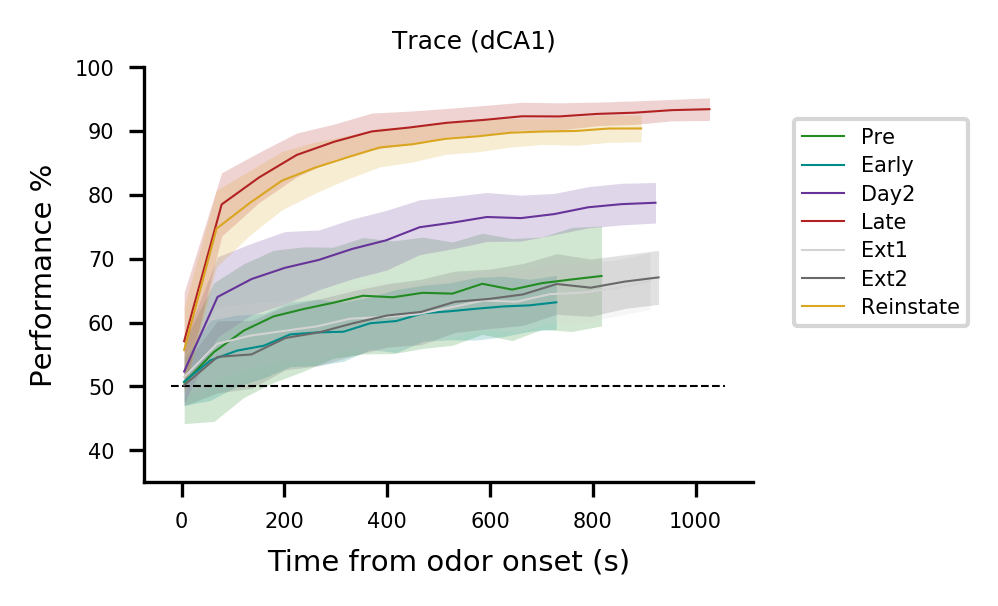

In [51]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_16_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_16_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Trace (dCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_dhpc.pdf'%NOTEBOOK_NAME)

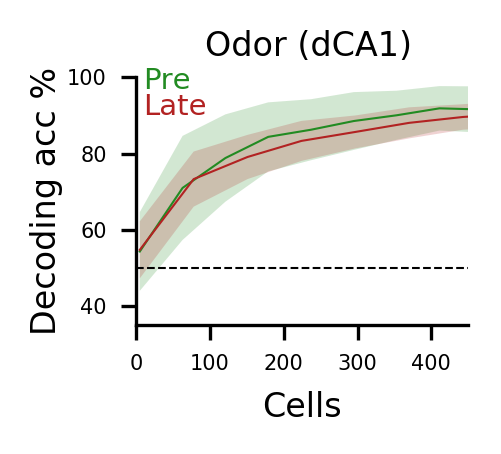

In [888]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_6_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Odor (dCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_BaPo_dhpc.pdf'%NOTEBOOK_NAME)

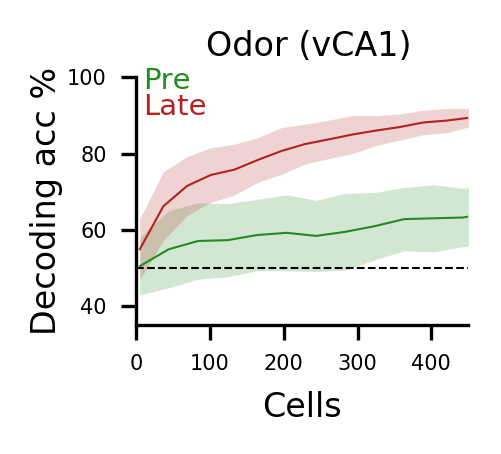

In [887]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_6_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Odor (vCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_BaPo_vhpc.pdf'%NOTEBOOK_NAME)

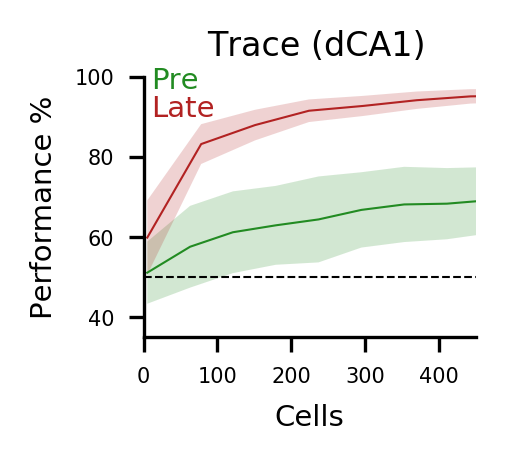

In [884]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_8_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_ylabel('Performance %')
ax.set_xlabel('Cells')
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Trace (dCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_BaPo_dhpc.pdf'%NOTEBOOK_NAME)

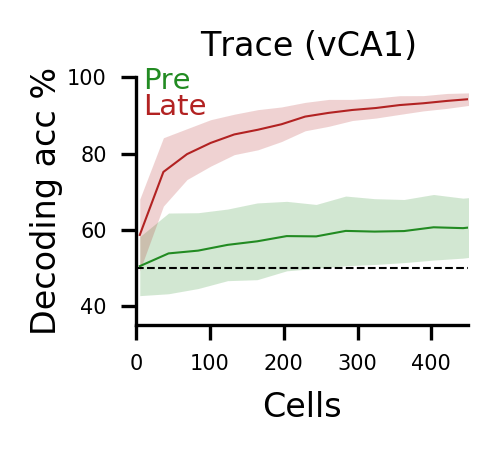

In [889]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_8_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Trace (vCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_BaPo_vhpc.pdf'%NOTEBOOK_NAME)

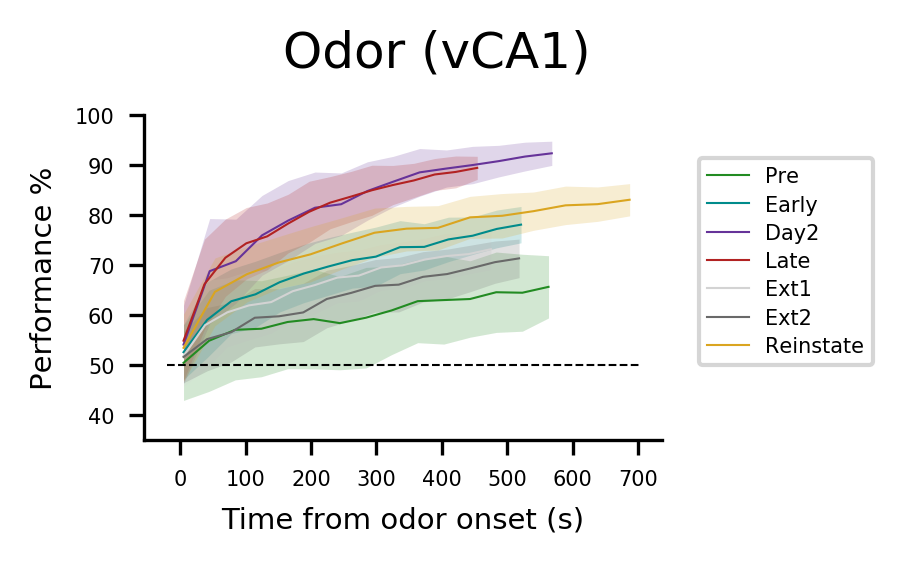

In [536]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_6_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Odor (vCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_vhpc.pdf'%NOTEBOOK_NAME)

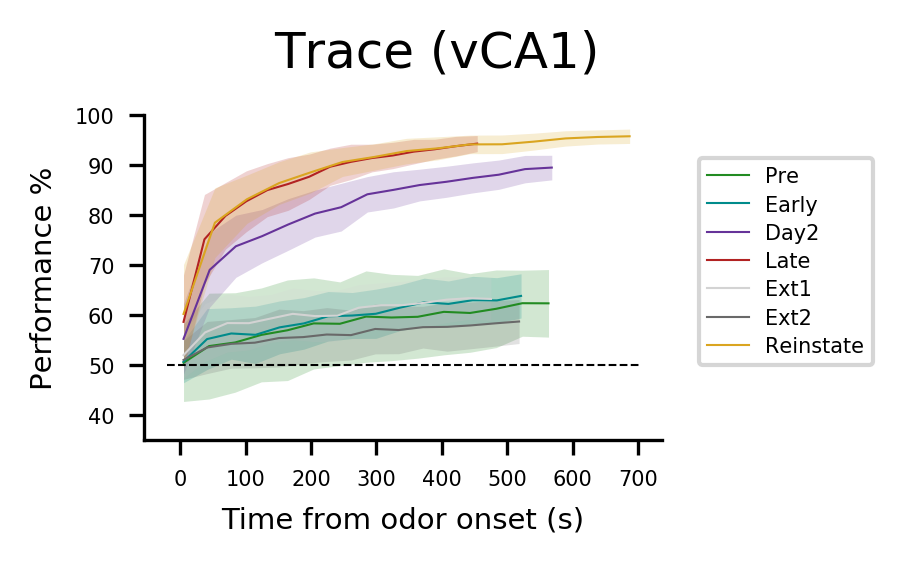

In [537]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_8_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Trace (vCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_vhpc.pdf'%NOTEBOOK_NAME)

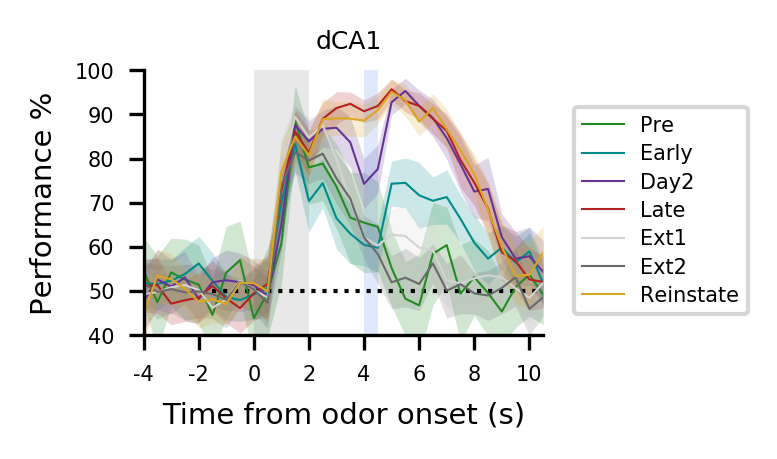

In [58]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    ax.plot([(t-8) for t in range(30)], [(np.mean(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100) for t in range(30)],
            color=c,label=sess_la)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100) for t in range(30)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100 for t in range(30)])
    ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.hlines(50, -3,21, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('dCA1',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_combined_dhpc.pdf'%NOTEBOOK_NAME)

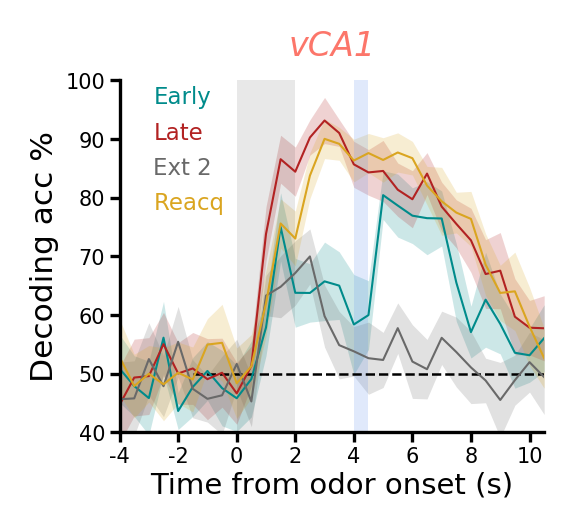

In [63]:
from matplotlib import cm
fig, ax = pl.subplots(1,1, figsize=(2, 1.7))

#for sess,c,sessla in zip(sessions,dark_co,session_labels):
for x in [1,2,4,5]:
    ax.plot([(t-8) for t in range(30)], [(np.mean(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100) for t in range(30)],
            color=dark_co[x],label=session_labels[x])
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100) for t in range(30)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100 for t in range(30)])
    ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=dark_co[x],linewidth=0)
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
#ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.45,fontsize=5)
ax.text(-5.7,97-1,'Early',color=dark_co[1],fontsize=5.5)
ax.text(-5.7,91-1,'Late',color=dark_co[2],fontsize=5.5)
ax.text(-5.7,85-1,'Ext 2',color=dark_co[4],fontsize=5.5)
ax.text(-5.7,79-1,'Reacq',color=dark_co[5],fontsize=5.5)
fig.tight_layout(pad=2)
ax.set_title('vCA1', color='#FC766AFF',fontstyle='italic',fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_combined_vhpc.pdf'%NOTEBOOK_NAME)

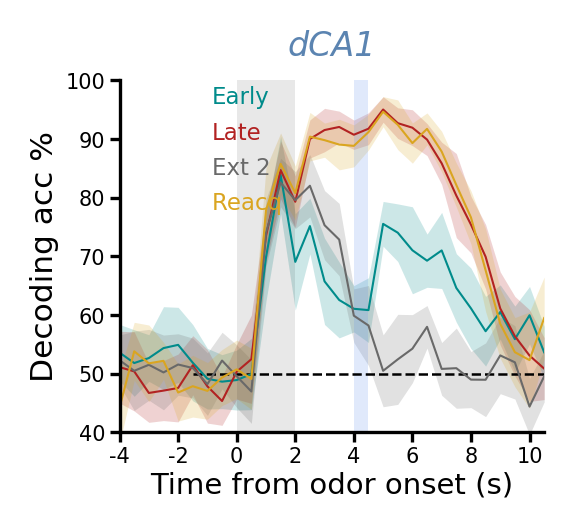

In [64]:
from matplotlib import cm
fig, ax = pl.subplots(1,1, figsize=(2, 1.7))

#for sess,c,sessla in zip(sessions,dark_co,session_labels):
for x in [1,2,4,5]:
    ax.plot([(t-8) for t in range(30)], [(np.mean(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100) for t in range(30)],
            color=dark_co[x],label=session_labels[x])
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100) for t in range(30)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100 for t in range(30)])
    ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=dark_co[x],linewidth=0)
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
#ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.45,fontsize=5)
ax.text(-1.7,97-1,'Early',color=dark_co[1],fontsize=5.5)
ax.text(-1.7,91-1,'Late',color=dark_co[2],fontsize=5.5)
ax.text(-1.7,85-1,'Ext 2',color=dark_co[4],fontsize=5.5)
ax.text(-1.7,79-1,'Reacq',color=dark_co[5],fontsize=5.5)
fig.tight_layout(pad=2)
ax.set_title('dCA1', color='#5B84B1FF',fontstyle='italic',fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_combined_dhpc.pdf'%NOTEBOOK_NAME)

### plot dhpc and vhpc on same plot. CS, Tr and US plots

In [65]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'p=%.3f'%(p/mcc) if (.05/mcc)<p<(.1/mcc) else
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [66]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    if lines==True:
        if p < thresh/mcc:
            if np.mean(array1) > np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            if np.mean(array1) < np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color2, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [67]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

expo U = 0.0 p = 0.00018267179111 r = -0.845154254729
None
post U = 66.5 p = 0.225601884565 r = 0.27890090406
None


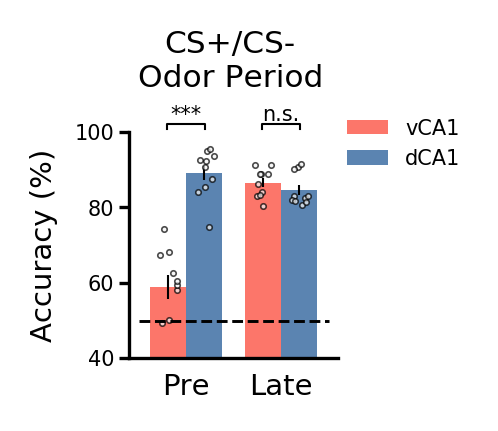

In [68]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_11_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_11_vhpc[sess][:loops])*100, width, color='#FC766AFF',yerr=v[sess])
    ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_11_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_11_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_11_dhpc[sess][:loops])*100, width,color='#5B84B1FF',yerr=d[sess])
    ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_11_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_11_vhpc[sess][:loops], mean_scores_gmin_tb_11_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess, report_stats(mean_scores_gmin_tb_11_vhpc[sess][:loops], mean_scores_gmin_tb_11_dhpc[sess][:loops])
        #max(np.mean(mean_scores_gmin_tb_11_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_11_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_11_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_11_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_11_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_11_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS-\nOdor Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_b.pdf'%NOTEBOOK_NAME)

In [ ]:
'#5B84B1FF','#97BC62FF'

expo U = 22.0 p = 0.0376353137873 r = -0.473286382648
None
post U = 7.5 p = 0.00148045163149 r = -0.718381116519
None


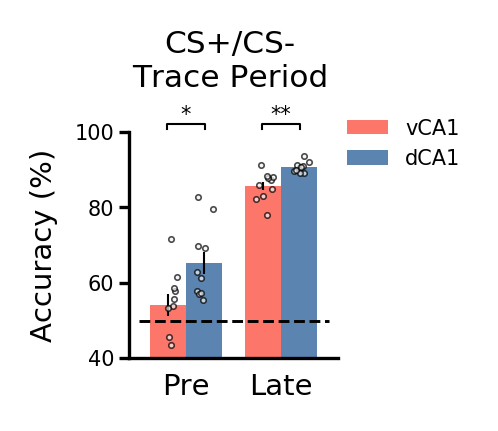

In [69]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_16_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_16_vhpc[sess][:loops])*100, width, color='#FC766AFF',yerr=v[sess])
    ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_16_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_16_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_16_dhpc[sess][:loops])*100, width,color='#5B84B1FF',yerr=d[sess])
    ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_16_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_16_vhpc[sess][:loops], mean_scores_gmin_tb_16_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess, report_stats(mean_scores_gmin_tb_16_vhpc[sess][:loops], mean_scores_gmin_tb_16_dhpc[sess][:loops])

pl.suptitle('CS+/CS-\nTrace Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_b.pdf'%NOTEBOOK_NAME)

In [70]:
new_dark_co = ["#080f0f","#a4bab7","#eff2c0","#bea57d"]

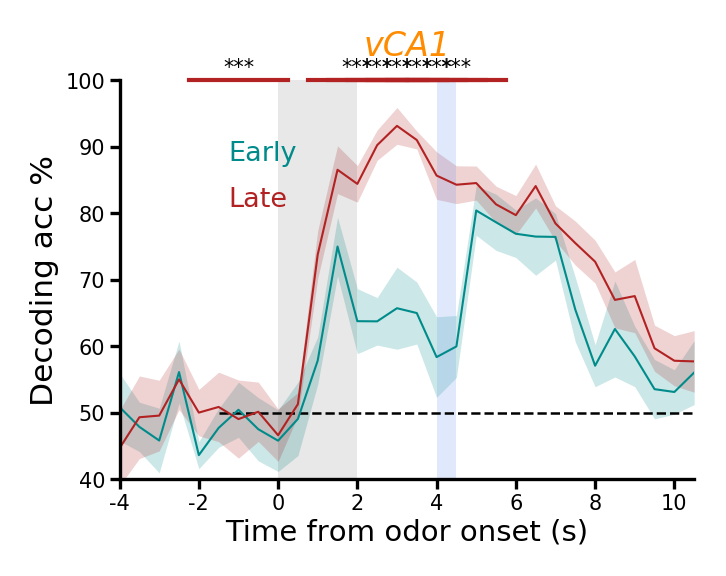

In [71]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for sess,co,la in zip(['pre','post'],[dark_co[1],dark_co[2]],['Early','Late']):
    ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(30)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(30)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100 for t in range(30)])
    ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['post'][:10]"%t),
                         t-8.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,88,'Early',color=dark_co[1],fontsize=6.5)
ax.text(-2.5,81,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PrPo_vCA1.pdf'%NOTEBOOK_NAME)

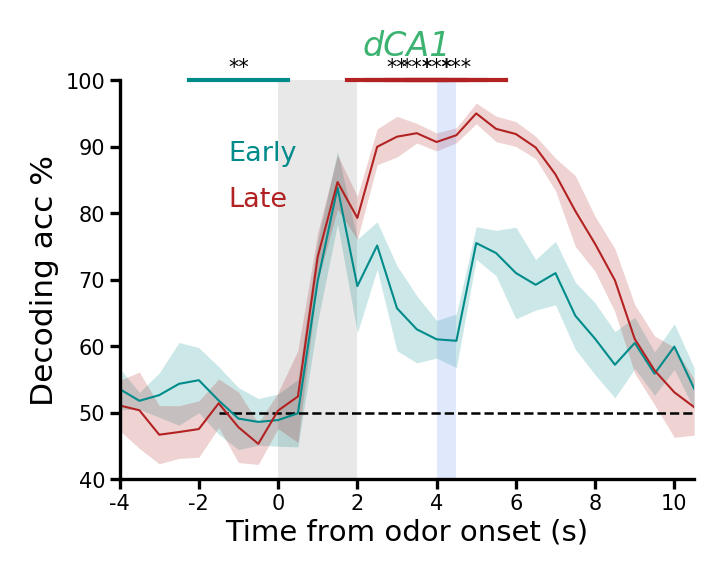

In [72]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for sess,co,la in zip(['pre','post'],[dark_co[1],dark_co[2]],['Early','Late']):
    ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(30)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(30)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100 for t in range(30)])
    ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_dhpc['post'][:10]"%t),
                         t-8.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,88,'Early',color=dark_co[1],fontsize=6.5)
ax.text(-2.5,81,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PrPo_dCA1.pdf'%NOTEBOOK_NAME)

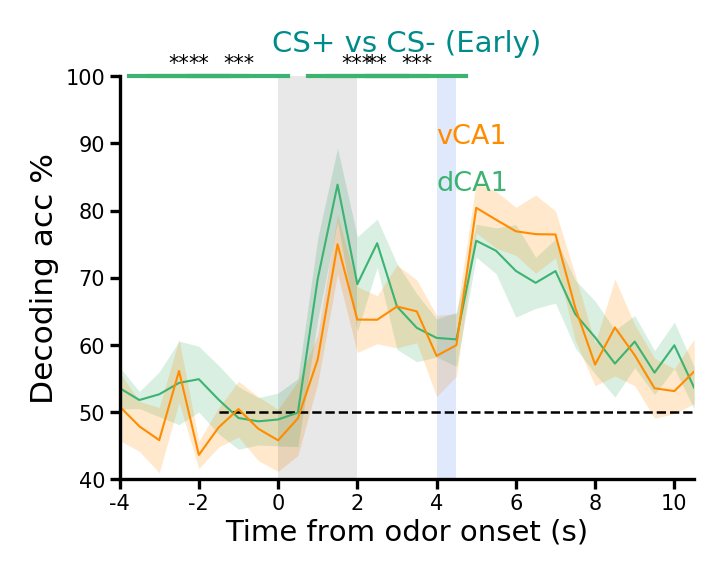

In [75]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for r,sess in zip(range(1),['pre']):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(30)])
        ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    #for t in range(30):
    #    if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='mediumseagreen')
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='darkorange')
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['pre'][:10]"%t),
                         t-8.5, t-3.5, 100,color1='mediumseagreen',color2='darkorange',thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
ax.set_ylim(40, 100)
ax.set_xlim(-8, 21)
ax.set_xticks(np.arange(-8,21, 4))
ax.set_xticklabels(np.arange(-4,11,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(8,90,'vCA1',color='darkorange',fontsize=6.5)
ax.text(8,83,'dCA1',color='mediumseagreen',fontsize=6.5)
ax.set_title('CS+ vs CS- (Early)', color=dark_co[1])
#ax.legend(bbox_to_anchor=(.68, .7),labelspacing=0.4,fontsize=5,frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_early_dVSv.pdf'%NOTEBOOK_NAME)

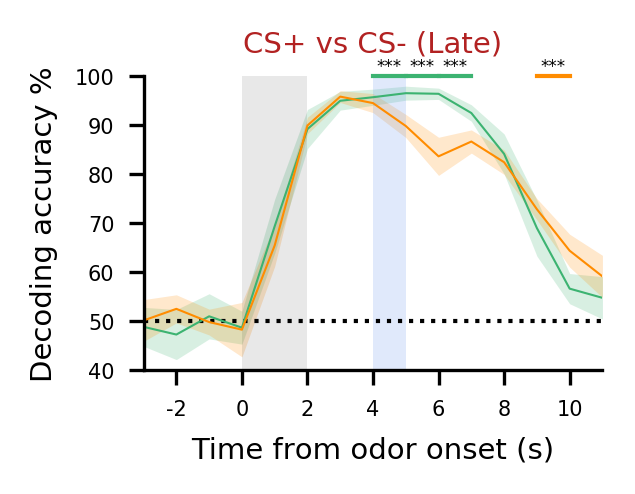

In [331]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for r,sess in zip(range(1),['post']):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(30)])
        ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['post'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['post'][:10]"%t),
                         t-8.5, t-3.5, 100,color1='mediumseagreen',color2='darkorange',thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Decoding accuracy %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.set_title('CS+ vs CS- (Late)', color=dark_co[2])
#ax.legend(bbox_to_anchor=(.68, .7),labelspacing=0.4,fontsize=5,frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_late_dVSv.pdf'%NOTEBOOK_NAME)

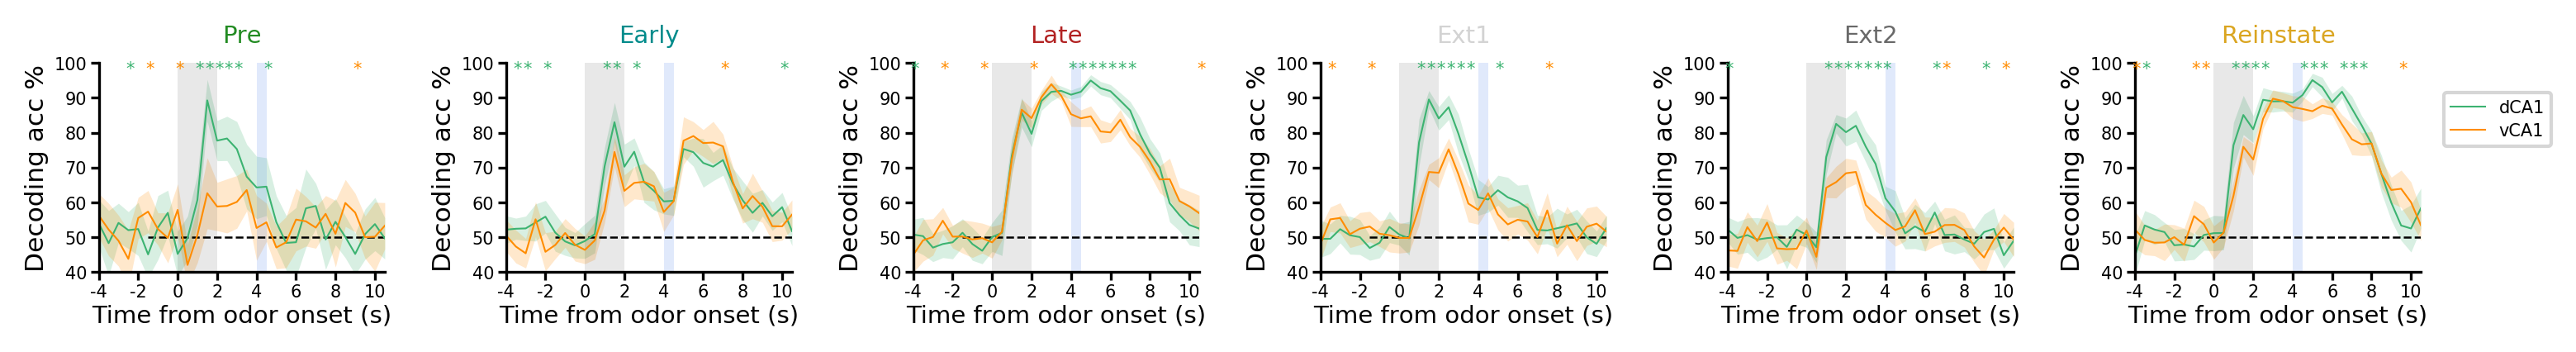

In [100]:
fig, ax = pl.subplots(1,6, figsize=(10, 1.5))

for r,sess,c in zip(range(6),sessions,('limegreen','b','r','silver','grey','y')):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax[r].plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100) for t in range(30)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100) for t in range(30)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100 for t in range(30)])
        ax[r].fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    for t in range(30):
        if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
            if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
                ax[r].text(t-8.25,97,'*',fontsize=5, color='mediumseagreen')
            if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
                ax[r].text(t-8.25,97,'*',fontsize=5, color='darkorange')
for x in range (0,6):
    ax[x].set_ylim(40, 100)
    ax[x].set_xlim(-8, 21)
    ax[x].set_xticks(np.arange(-8,21, 4))
    ax[x].set_xticklabels(np.arange(-4,11,2))
    ax[x].tick_params(axis='both',pad=1,length=2.5)
    ax[x].hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
    ax[x].set_xlabel('Time from odor onset (s)',labelpad=1)
    ax[x].set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
    pt.plot_period_bar(ax[x], 0, start_end=(0, 4), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.2)
    ax[x].set_title(session_labels[x], color=dark_co[x])
ax[5].legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)


fig.savefig('../img/%s_gmin_horizontal_dVSv.pdf'%NOTEBOOK_NAME)

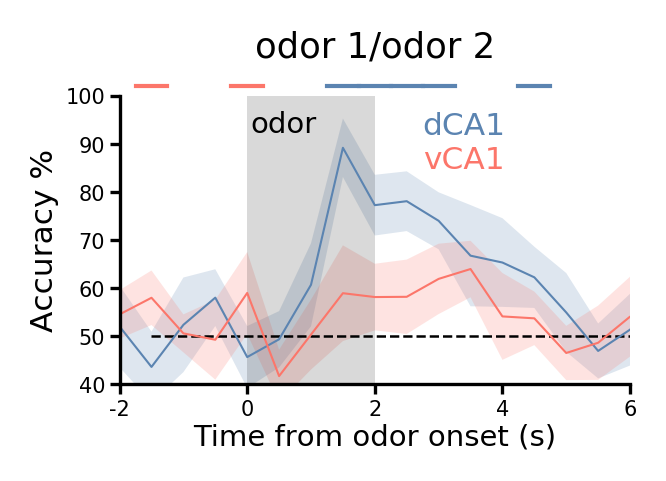

In [109]:
fig, ax = pl.subplots(1,1,figsize=(2.3, 1.7))

for r,sess in zip(range(1),['expo']):
    for re,co,la in zip(('dhpc','vhpc'),('#5B84B1FF','#FC766AFF'),('dCA1','vCA1')):
        ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(30)])
        ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    #for t in range(13):
    #    if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='mediumseagreen')
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='darkorange')
for t in range(25):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['expo'][:10]"%t),
                         t-8.5, t-7.5, 102,color1='#5B84B1FF',color2='#FC766AFF',thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)

ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_ylim(40, 100)
ax.set_xlim(-4, 12)
ax.set_xticks(np.arange(-4,13, 4))
ax.set_xticklabels(np.arange(-2,7,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Accuracy %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.15)
ax.set_title('odor 1/odor 2',fontsize=8.5,y=1.05)
ax.text(0.1,92.5,'odor',color='k',fontsize=7)
ax.text(5.5,85,'vCA1',color='#FC766AFF',fontsize=7.5)
ax.text(5.5,92,'dCA1',color='#5B84B1FF',fontsize=7.5)
#ax.legend(bbox_to_anchor=(.64, .9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_baseline_dVSv.pdf'%NOTEBOOK_NAME)

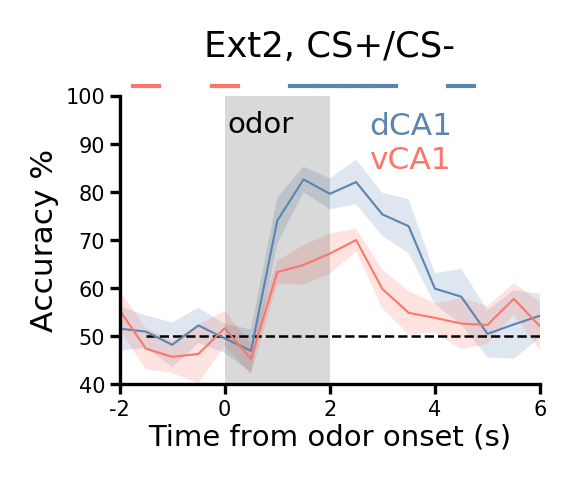

In [107]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for r,sess in zip(range(1),['ext2']):
    for re,co,la in zip(('dhpc','vhpc'),('#5B84B1FF','#FC766AFF'),('dCA1','vCA1')):
        ax.plot([(t-8) for t in range(30)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(30)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(30)])
        ax.fill_between([(t-8) for t in range(30)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    #for t in range(13):
    #    if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='mediumseagreen')
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-8.25,97,'*',fontsize=5, color='darkorange')
for t in range(25):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['expo'][:10]"%t),
                         t-8.5, t-7.5, 102,color1='#5B84B1FF',color2='#FC766AFF',thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)

ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_ylim(40, 100)
ax.set_xlim(-4, 12)
ax.set_xticks(np.arange(-4,13, 4))
ax.set_xticklabels(np.arange(-2,7,2))
ax.tick_params(axis='both',pad=1,length=2.5)
ax.hlines(50, -3,21, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Accuracy %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 4), color='k', delta_y=100,alpha=.15)
ax.set_title('Ext2, CS+/CS-',fontsize=8.5,y=1.05)
ax.text(0.1,92.5,'odor',color='k',fontsize=7)
ax.text(5.5,85,'vCA1',color='#FC766AFF',fontsize=7.5)
ax.text(5.5,92,'dCA1',color='#5B84B1FF',fontsize=7.5)
#ax.legend(bbox_to_anchor=(.64, .9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ext2_dVSv.pdf'%NOTEBOOK_NAME)

U = 0.0 p = 0.00018267179111 r = -0.845154254729


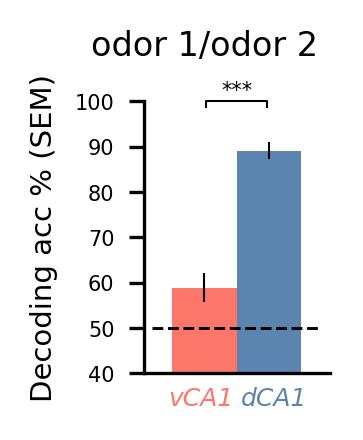

In [98]:
from matplotlib.patches import Patch
labels = session_labels
#x = np.arange(3)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
i=0
fig, ax = pl.subplots(figsize=(.8,1.2))

v = np.array(np.std(eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops])/np.sqrt(loops)*100)
ax.bar(0 - width/2, np.mean(eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops])*100, width, color='#FC766AFF',yerr=v)
d = np.array(np.std(eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops])/np.sqrt(loops)*100)
ax.bar(0 + width/2,  np.mean(eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops])*100, width,color='#5B84B1FF',yerr=d)
ax.hlines(50,-.5,.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
#ax.set_xticks(0)
ax.set_xticklabels(['CS'])
ax.set_ylim(40,100)
#ax.legend([Patch(facecolor='darkorange'),Patch(facecolor='mediumseagreen')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
ax.text(-.21,33,'vCA1',color='#FC766AFF',fontsize=6,fontstyle='italic',ha='center')
ax.text(0.22,33,'dCA1',color='#5B84B1FF',fontsize=6,fontstyle='italic',ha='center')
pvs=[]

pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops], eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops],
    -.18+i,0.18+i,100))
    #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
    #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
#pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops],.5,-.2+i,
#           np.mean(eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops])*100+v[per]+1,loops=loops,sig_func=None,colors='k'))
#pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops],.5, .2+i,
#           np.mean(eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops])*100+d[per]+1,loops=loops,sig_func=None,colors='k'))
report_stats(eval("mean_scores_gmin_tb_11_vhpc['expo']")[:loops], eval("mean_scores_gmin_tb_11_dhpc['expo']")[:loops])
pl.suptitle('odor 1/odor 2',y=1.08,x=.38,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_expo_10_loops.pdf'%NOTEBOOK_NAME)

In [99]:
save_workspace(db)

Could not store variable 'cm'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'matplotlib'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'np'. Skipping...
